In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def loadImages(path):
  image_files = [cv2.imread(os.path.join(path, file)) for file in os.listdir(path)[0:100]] # Mengambil image dari directory drive
  return image_files

def resizeImages(dim, images):
  image_files = [cv2.resize(image, dim, interpolation = cv2.INTER_AREA) for image in images] # Resize gambar menjadi dimensi yang ditentukan
  return image_files

def grayscaleImages(images):
  image_files = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images] # Color image processing dari rgb menjadi grayscale
  return image_files

In [4]:
def ImageProcessing(path):
  dim = (320, 240) # Ukuran resize
  img=loadImages(path)
  img=resizeImages(dim, img)
  img=grayscaleImages(img)
  return img

In [5]:
def data_splitting(data, train_size):
  train_num=int(train_size*len(data[0])); test_num=int(len(data[0])-train_num)
  
  X_train = data[0][:train_num]+data[1][:train_num]+data[2][:train_num]
  X_test = data[0][-test_num:]+data[1][-test_num:]+data[2][-test_num:]
  y_train = [0 for i in range(train_num)]+[1 for i in range(train_num)]+[2 for i in range(train_num)]
  y_test = [0 for i in range(test_num)]+[1 for i in range(test_num)]+[2 for i in range(test_num)]

  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [6]:
def data_shuffling(X_train, X_test, y_train, y_test):
  train=list(zip(X_train, y_train))
  random.shuffle(train)
  X_train=[data[0] for data in train]
  y_train=[data[-1] for data in train]

  test=list(zip(X_test, y_test))
  random.shuffle(test)
  X_test=[data[0] for data in test]
  y_test=[data[-1] for data in test]
  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [7]:
image_path = "/content/drive/MyDrive/Pembelajaran Mesin/flowers"
sunflowers=ImageProcessing(image_path + '/sunflower')
dandelions = ImageProcessing(image_path + '/dandelion')
roses = ImageProcessing(image_path + '/rose')

In [8]:
data=[sunflowers, dandelions, roses]
X_train, X_test, y_train, y_test=data_splitting(data, 0.8)

In [9]:
# X_train, X_test, y_train, y_test=data_shuffling(X_train, X_test, y_train, y_test)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240,320,1)),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),   
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 106, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 106, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 104, 8)        4616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 34, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 34, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6800)              0

In [54]:
if str(X_train.shape) == "(240, 240, 320)":
    X_train = np.expand_dims(X_train, axis=3)
    
if str(X_test.shape) == "(60, 240, 320)":
    X_test = np.expand_dims(X_test, axis=3)

In [55]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    X_train,
    y=y_train,
    batch_size=16,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.
)

validation_generator = validation_datagen.flow(
    X_test,
    y=y_test,
    batch_size=10
)

In [56]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=15, validation_data = validation_generator, validation_steps=6, verbose = 1)

Epoch 1/50
15/15 [==============================] - 2s 94ms/step - loss: 1.1176 - accuracy: 0.3625 - val_loss: 1.0970 - val_accuracy: 0.4333
Epoch 2/50
15/15 [==============================] - 1s 85ms/step - loss: 1.0998 - accuracy: 0.3500 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 1s 86ms/step - loss: 1.1019 - accuracy: 0.3083 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 1s 85ms/step - loss: 1.1009 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 1s 86ms/step - loss: 1.0990 - accuracy: 0.3458 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 1s 86ms/step - loss: 1.1032 - accuracy: 0.3208 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 1s 87ms/step - loss: 1.1022 - accuracy: 0.3000 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 8/50
15

# Learning Rate = 0.1

## Tanpa Augmentation

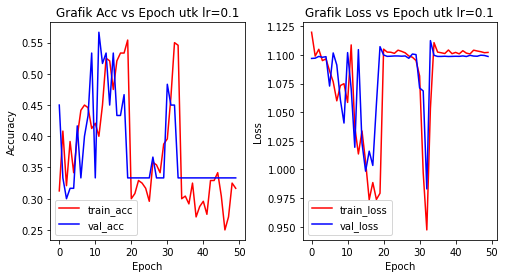

In [42]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.1')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.1')
ax[1].legend()

## Augmentation

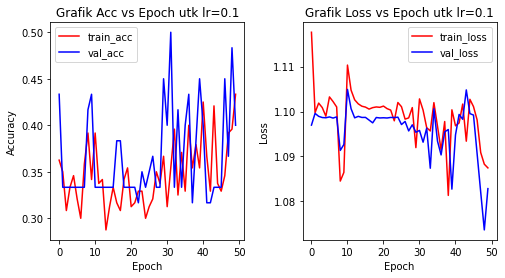

In [57]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.1')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.1')
ax[1].legend()

# Learning Rate = 0.8

## Tanpa Augmentation

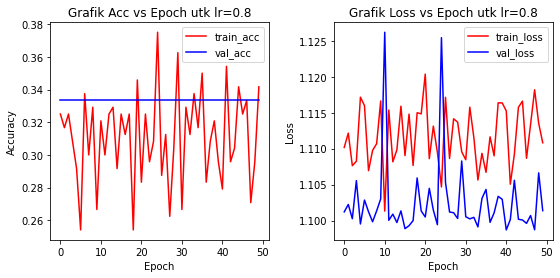

In [49]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.8')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.8')
ax[1].legend()

## Augmentation

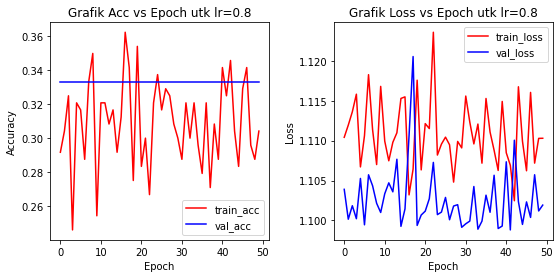

In [52]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['accuracy'], 'r', label='train_acc')
ax[0].plot(history.history['val_accuracy'], 'blue', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.8')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'blue', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.8')
ax[1].legend()